In [1]:
import json 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
from glob import glob 
os.chdir('../')

def load_df(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir,method):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,method,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
      
    fig.suptitle(class_name)
    plt.show()
    
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

,index,auroc
0,img_level,0.836500
1,pix_level,0.992736


In [80]:
log_dir

'./results/ProxyCoreBase/VISA/candle/proxy_nsoftmax_scheduler-anomaly_ratio_0.0/seed_0/result.txt'

In [81]:
version = ['proxy_nsoftmax_scheduler-anomaly_ratio_0.0']

result_dir = './results'
dataset = 'VISA'
method = 'ProxyCoreBase'
log_dirs = np.concatenate([glob(os.path.join(result_dir, method,dataset,'*',v,'seed_0','result.txt')) for v in version])

df = pd.DataFrame()

for log_dir in log_dirs:
    auroc_list = {}
    class_name = log_dir.split('/')[4]
    
    data = load_df(log_dir)
    
    data = pd.DataFrame(data['test_metrics'][np.argmax([d['img_level']['auroc'] for d in data['test_metrics']])]).iloc[0,:].reset_index()
    temp_df = data 
    
    temp_df['class'] = class_name 
    temp_df['anomaly_ratio'] = float(log_dir.split('/')[-3].split('-')[-1].split('_')[-1])
    temp_df['exp_name'] = log_dir.split('/')[-3].split('-')[0]
    
    
    df = pd.concat([df,temp_df])

df = df.melt(['index','class','anomaly_ratio','exp_name'])
# exp_d = {'Proxy_single_base' : 'ProxyNCA', 'Proxy_single_anchor_loss':'Proxy anchor', 'Proxy_nsoftmax' : 'Proxy nSoftmax'}
# df['exp_name'] = df['exp_name'].map(exp_d)
ind_d = {'img_level':'Image Level', 'pix_level' : 'Pixel Level'}
df['index'] = df['index'].map(ind_d)

In [85]:
# df = pd.concat([df,df2,df3,df4])
# df = df.reset_index(drop=True)
result = df[df['index']=='Image Level'].reset_index(drop=True).pivot_table(index=['class'], columns = ['exp_name','anomaly_ratio'],values='value')
result.loc['Average'] = result.mean(axis=0).values


In [86]:
result

exp_name,proxy_nsoftmax_scheduler
anomaly_ratio,0.0
class,
candle,0.983600
capsules,0.836500
cashew,0.976200
chewinggum,0.990000
fryum,0.976800
macaroni1,0.976000
macaroni2,0.797000
pcb1,0.971000


In [35]:
df[(df['exp_name'].apply(lambda x : x not in ['ReconPatch','ProxyNCA','Proxy anchor'])) & (df['index']==a_type)].reset_index(drop=True)

,index,class,anomaly_ratio,exp_name,variable,value
0,Pixel Level,wood,0.0,Proxy nSoftmax,auroc,0.949447
1,Pixel Level,wood,0.2,Proxy nSoftmax,auroc,0.95143
2,Pixel Level,wood,0.1,Proxy nSoftmax,auroc,0.948832
3,Pixel Level,capsule,0.0,Proxy nSoftmax,auroc,0.987986
4,Pixel Level,capsule,0.2,Proxy nSoftmax,auroc,0.986466
...,...,...,...,...,...,...
411,Pixel Level,grid,0.0,coteaching_nsoftmax,auroc,0.980025
412,Pixel Level,grid,0.1,coteaching_nsoftmax,auroc,0.94553
413,Pixel Level,leather,0.2,coteaching_nsoftmax,auroc,0.994034
414,Pixel Level,leather,0.0,coteaching_nsoftmax,auroc,0.992935


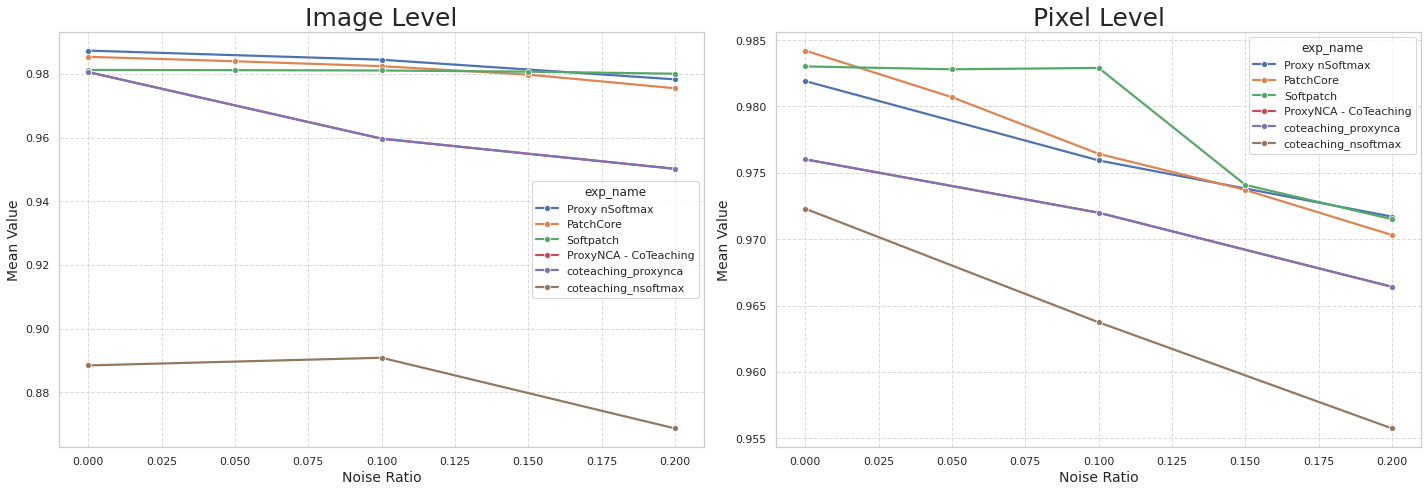

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style="whitegrid")  # Set the background style

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

for i, a_type in enumerate(['Image Level', 'Pixel Level']):
    sns.lineplot(
        x='anomaly_ratio',
        y='value',
        hue = 'exp_name',
        data= df[(df['exp_name'].apply(lambda x : x not in ['ReconPatch','ProxyNCA','Proxy anchor'])) & (df['index']==a_type)].reset_index(drop=True),
        ax=axes[i],
        linewidth=2.2,
        markers=True,  # Show markers at data points
        marker='o',    # Marker style
        errorbar=None  # Disable confidence intervals
    )
    axes[i].set_title(f"{a_type}", size=25)
    axes[i].set_xlabel("Noise Ratio", size=14)
    axes[i].set_ylabel("Mean Value", size=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


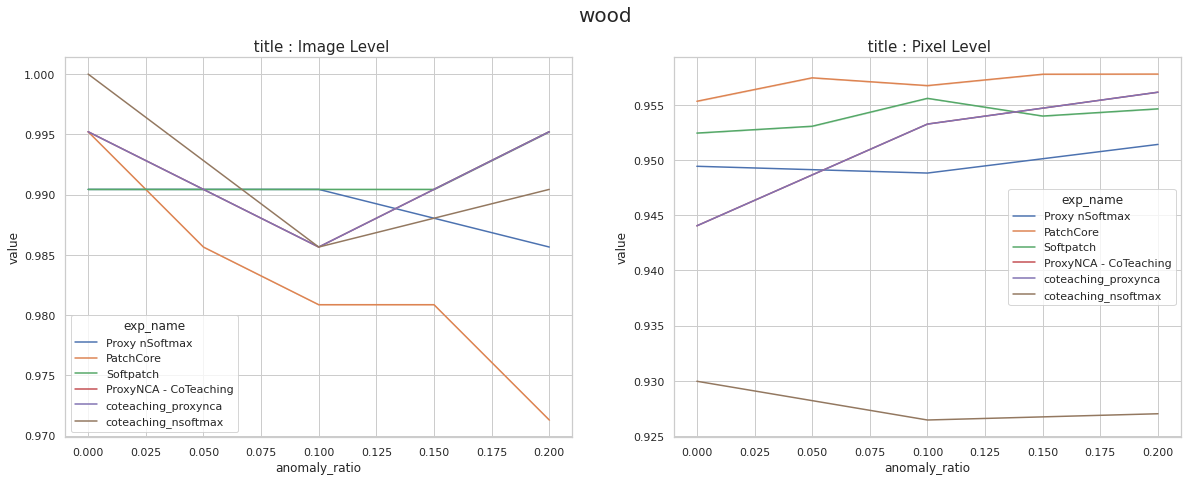

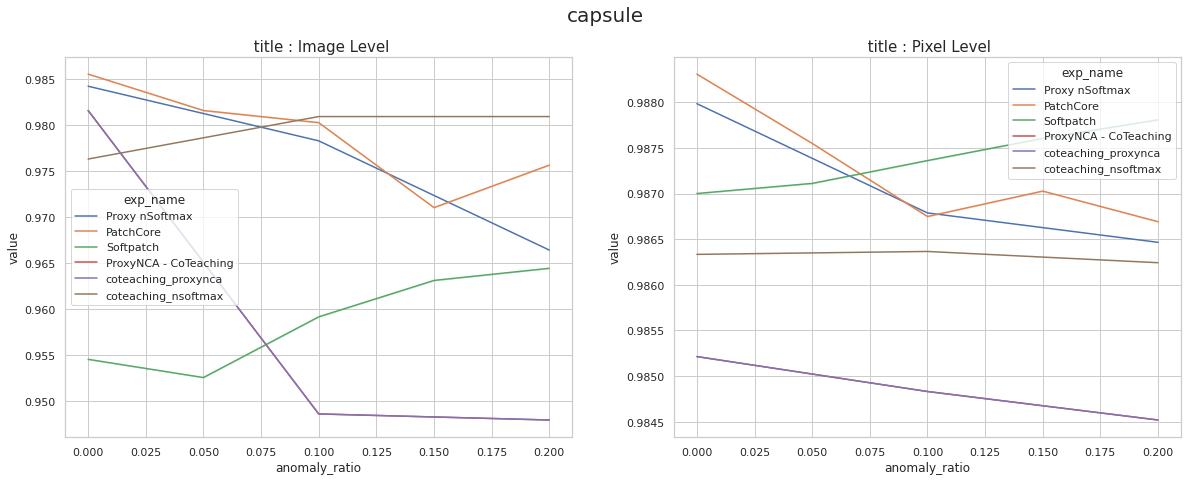

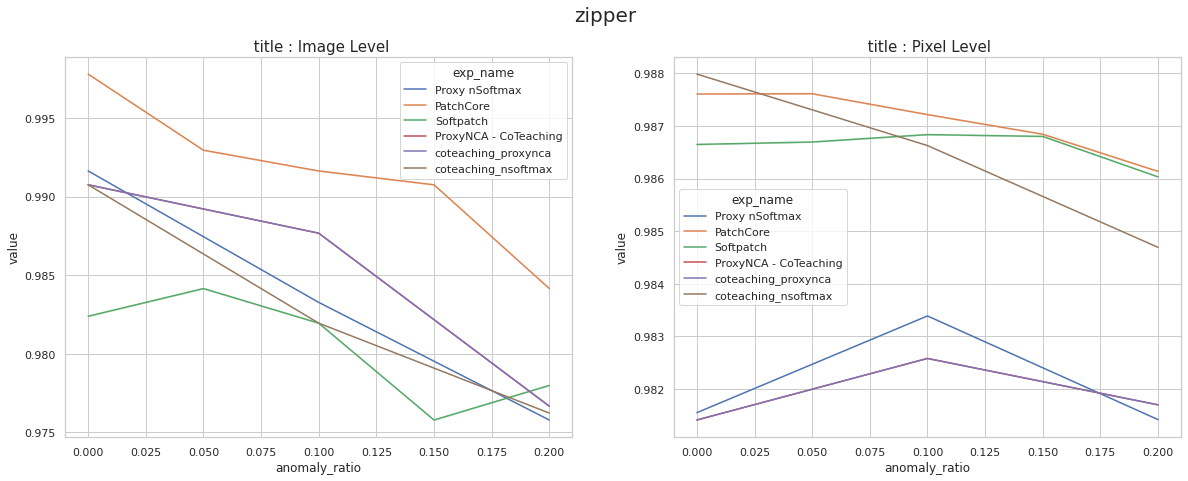

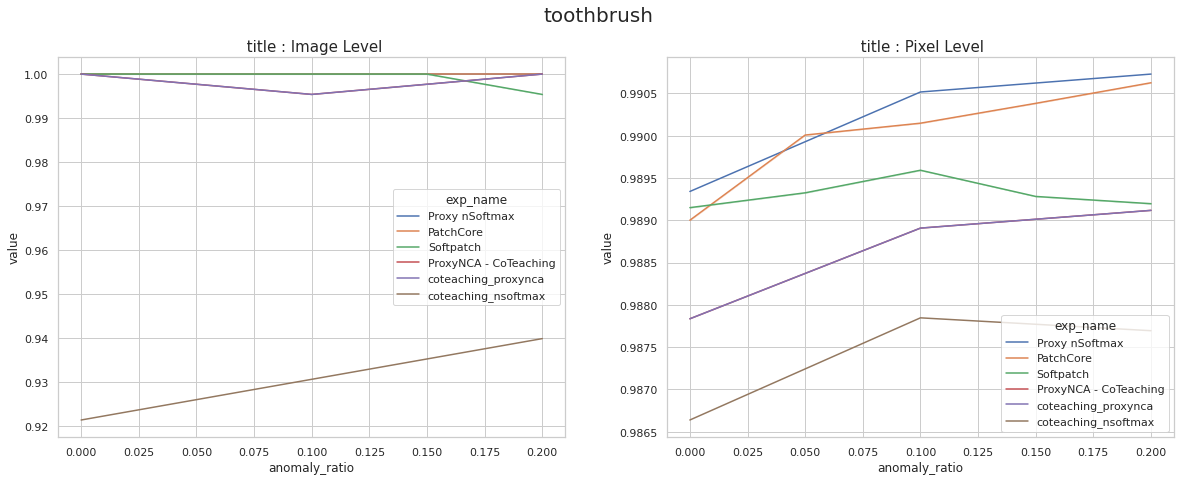

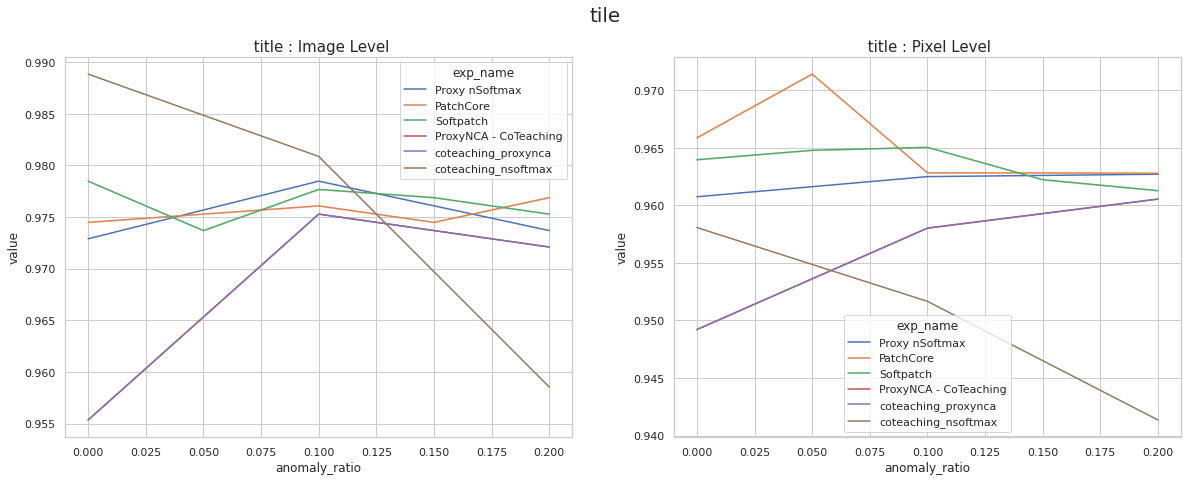

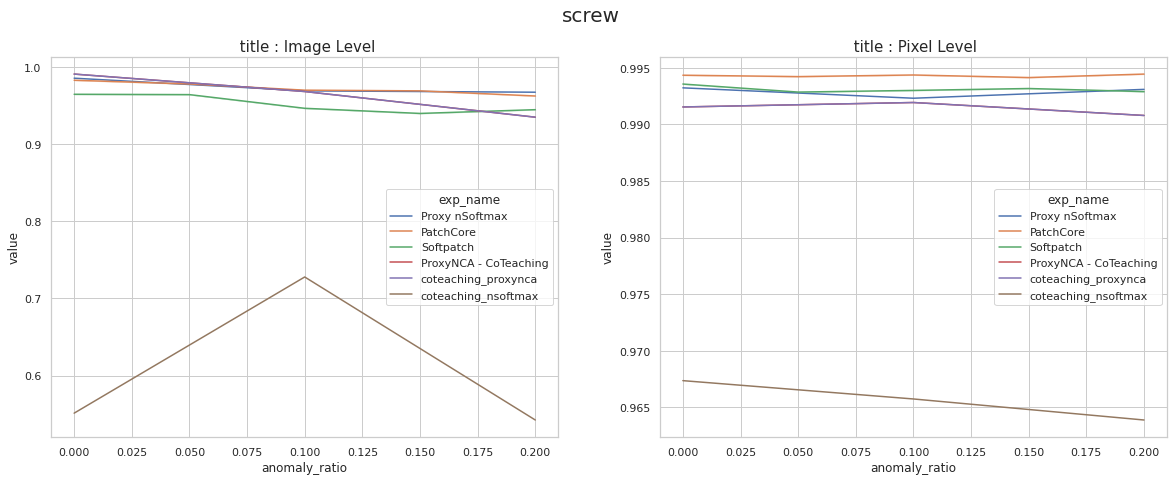

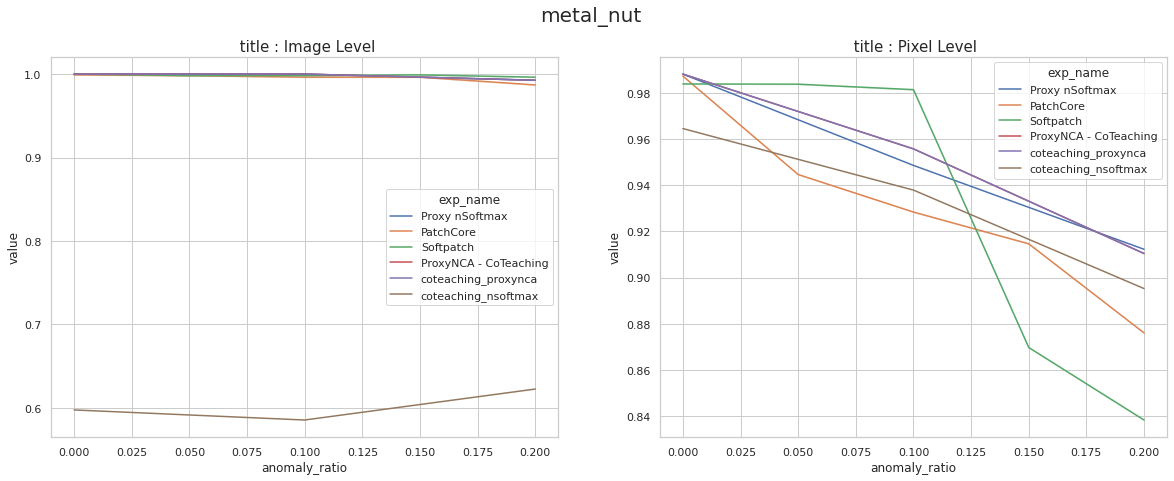

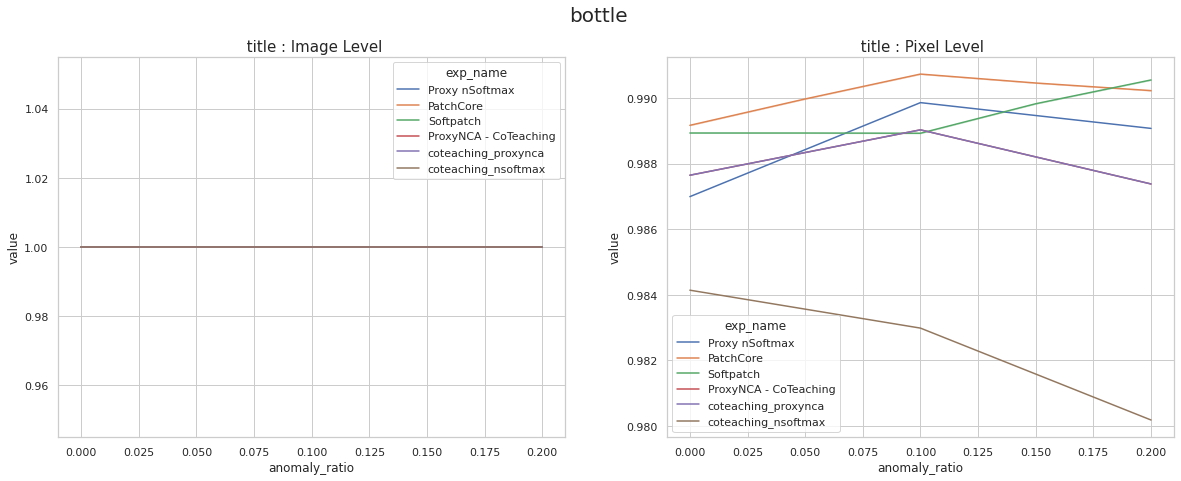

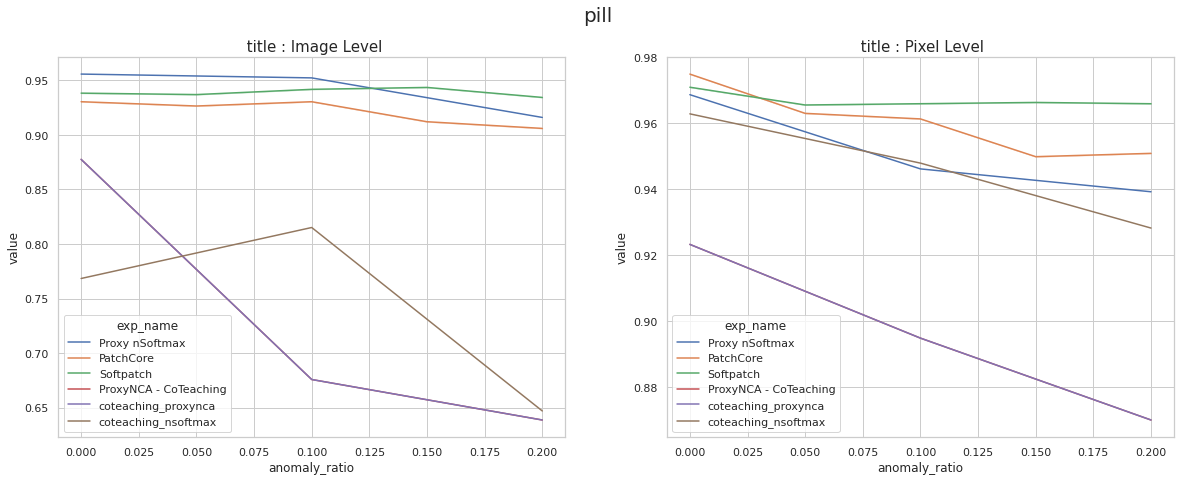

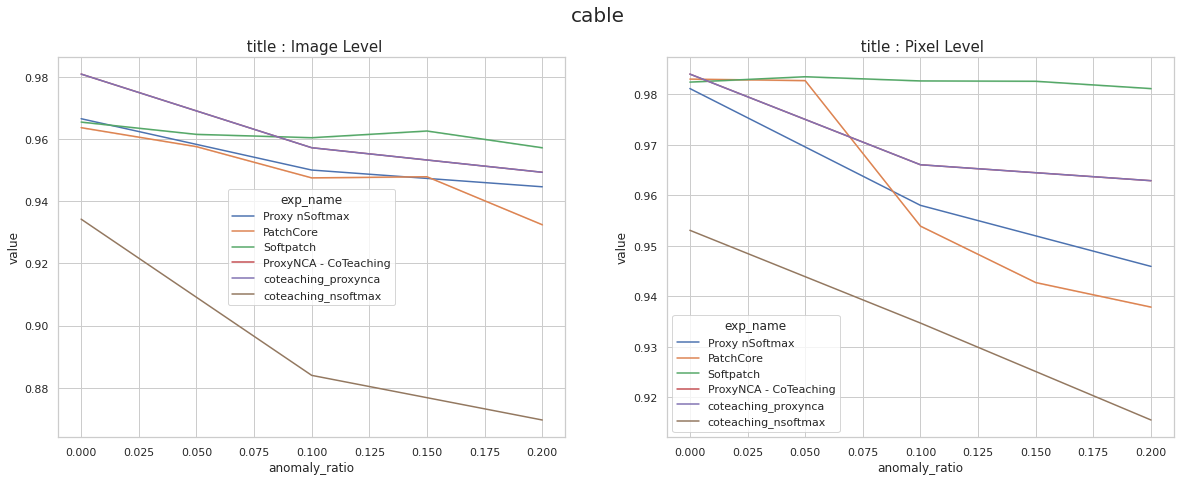

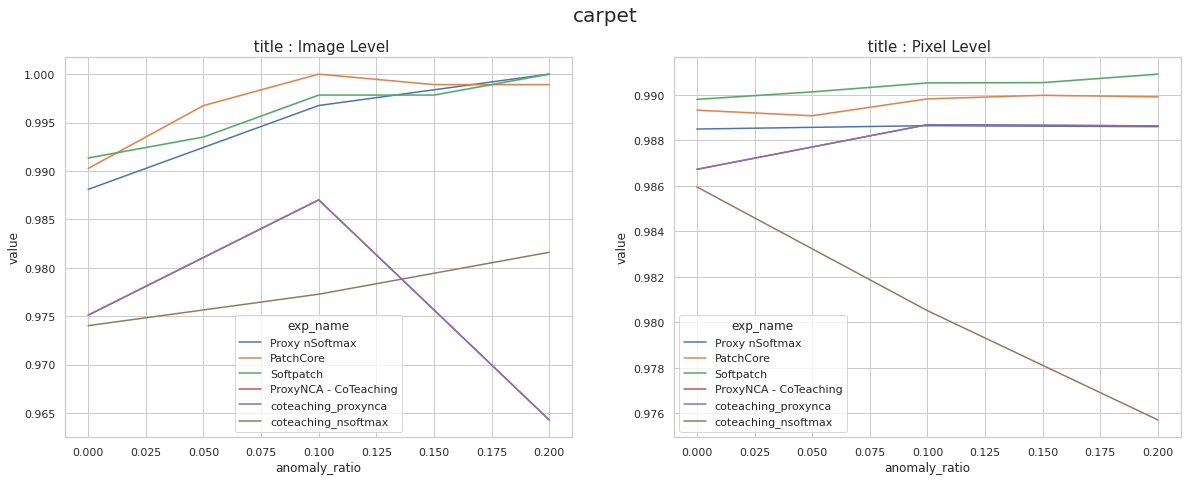

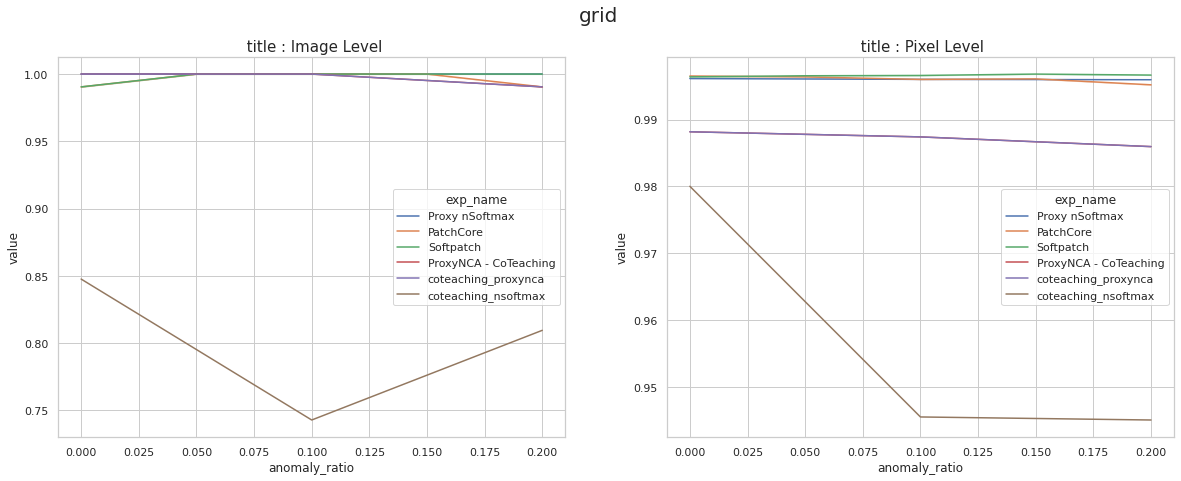

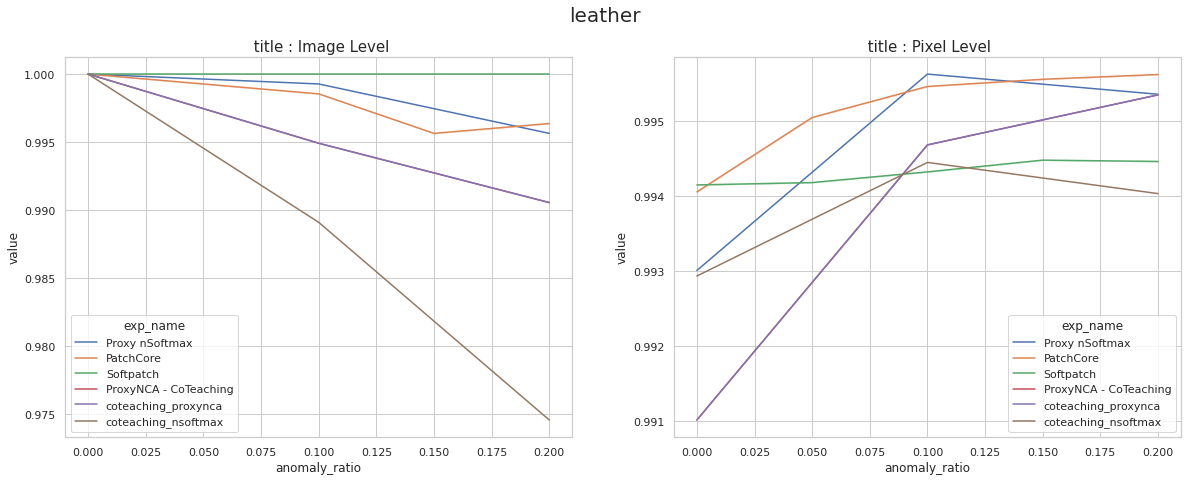

TypeError: 'NoneType' object is not iterable

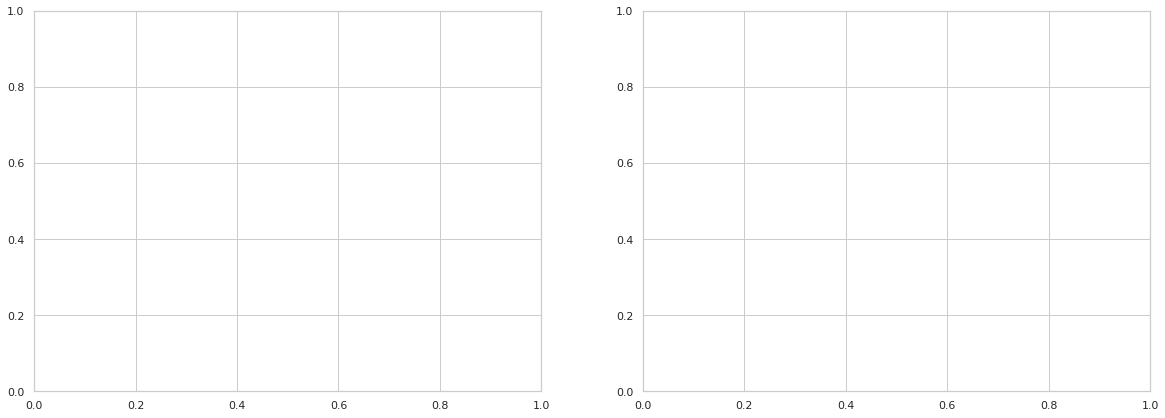

In [46]:


for class_name in df['class'].unique():
    fig,axes = plt.subplots(1,2, figsize=(20,7))

    for i, a_type in enumerate(['Image Level', 'Pixel Level']):
        sns.lineplot(
            x = 'anomaly_ratio',
            y = 'value',
            hue = 'exp_name',
            data = df[(df['exp_name'].apply(lambda x : x not in ['ReconPatch','ProxyNCA','Proxy anchor'])) & (df['index']==a_type) & (df['class']==class_name)].reset_index(drop=True),
            ax = axes[i]
        )   
        
        axes[i].set_title(f" title : {a_type}",size=15)
    fig.suptitle(class_name,size=20)
    
    plt.show()


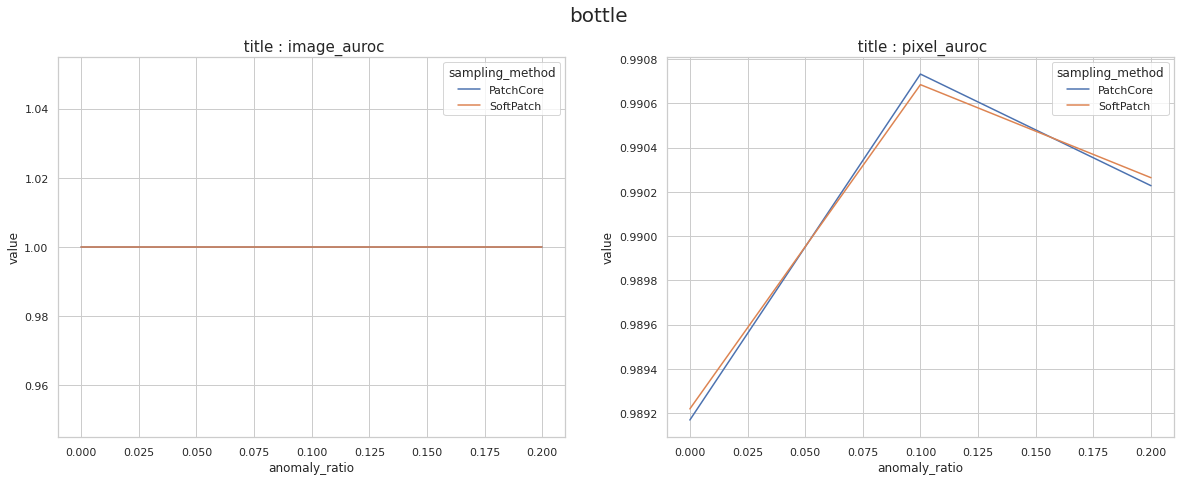

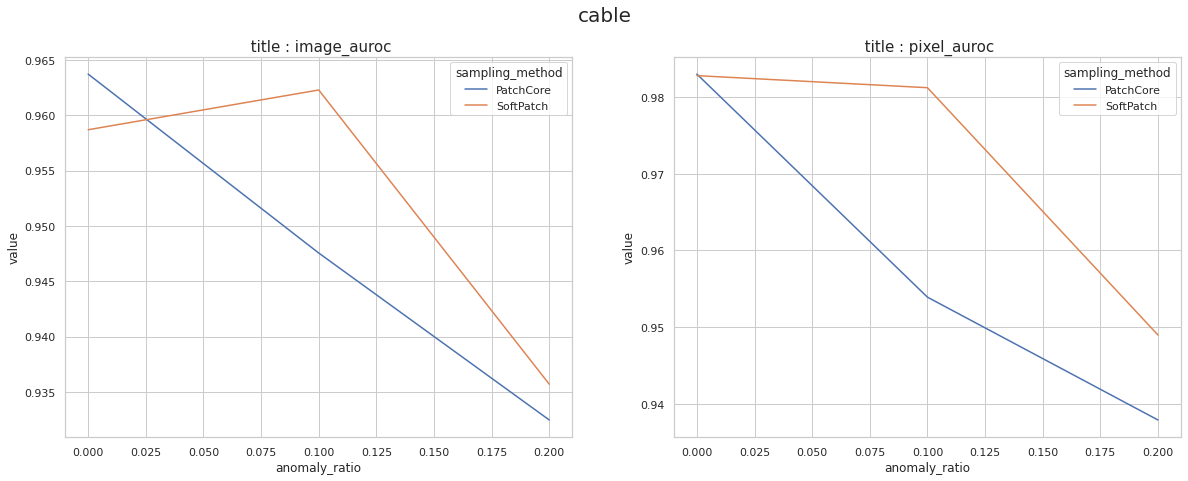

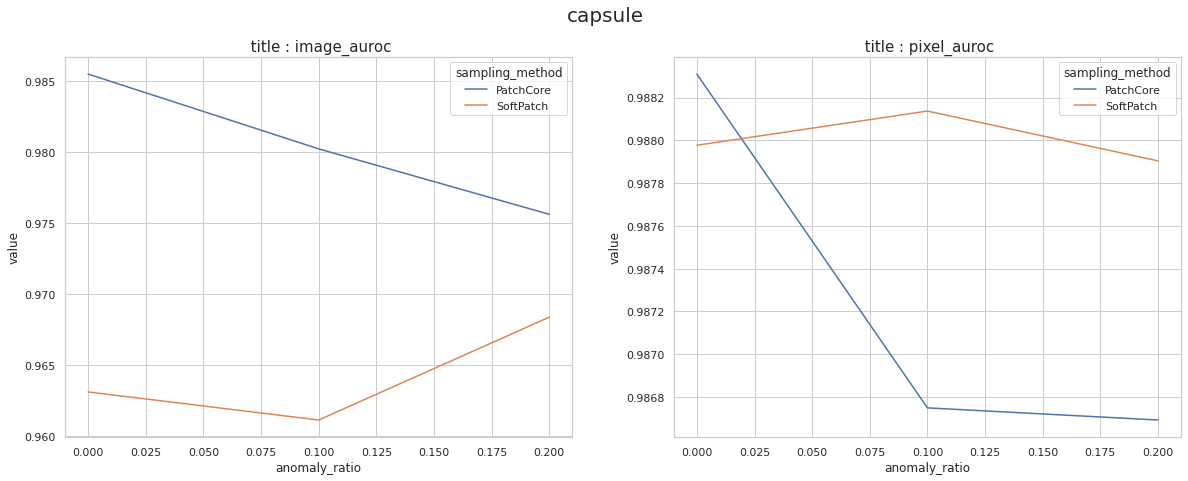

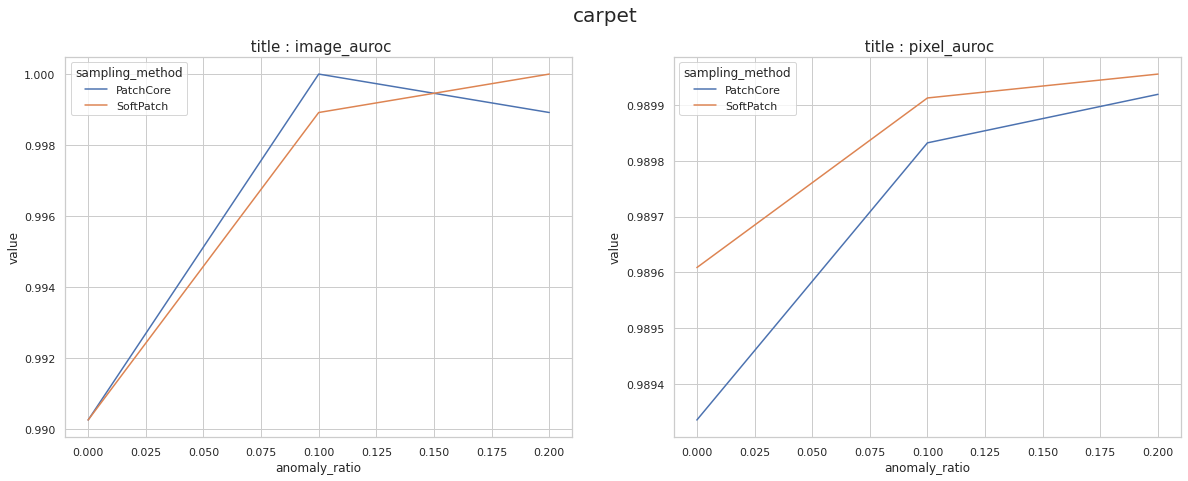

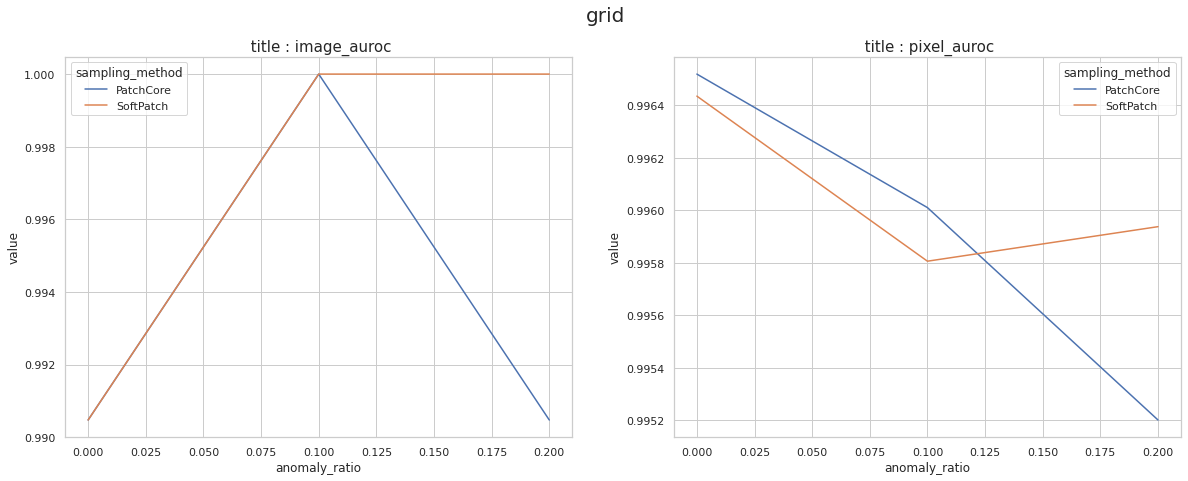

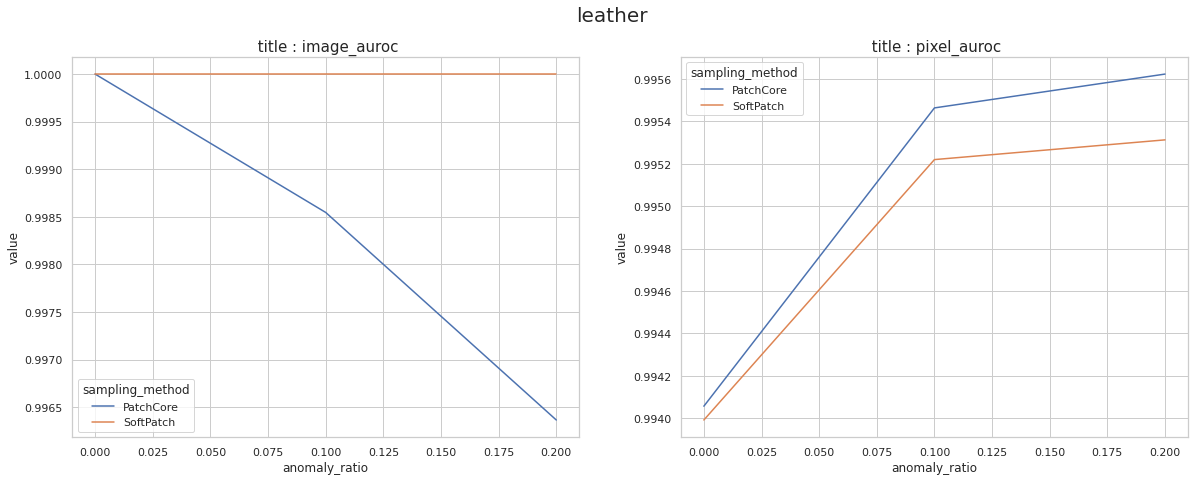

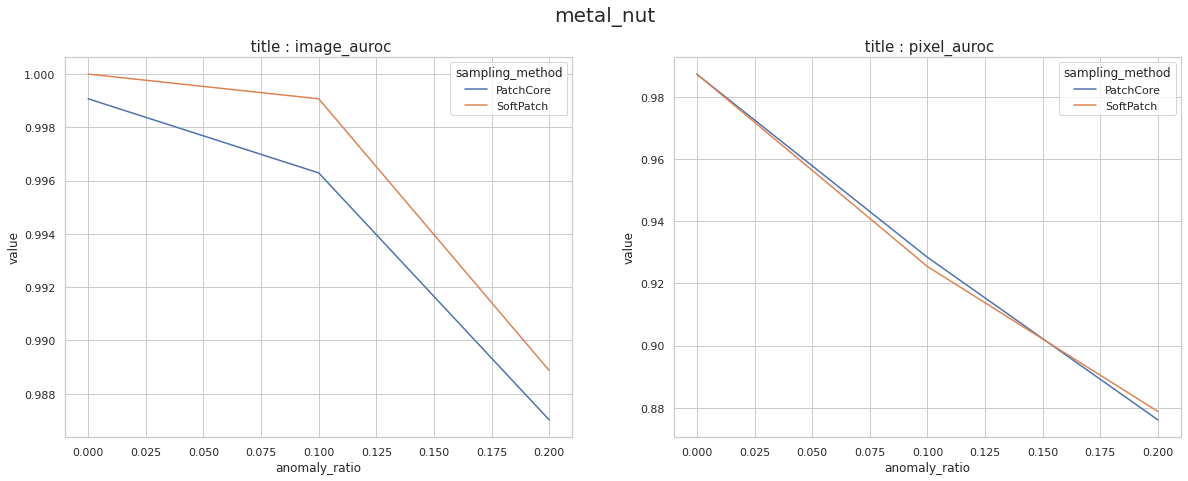

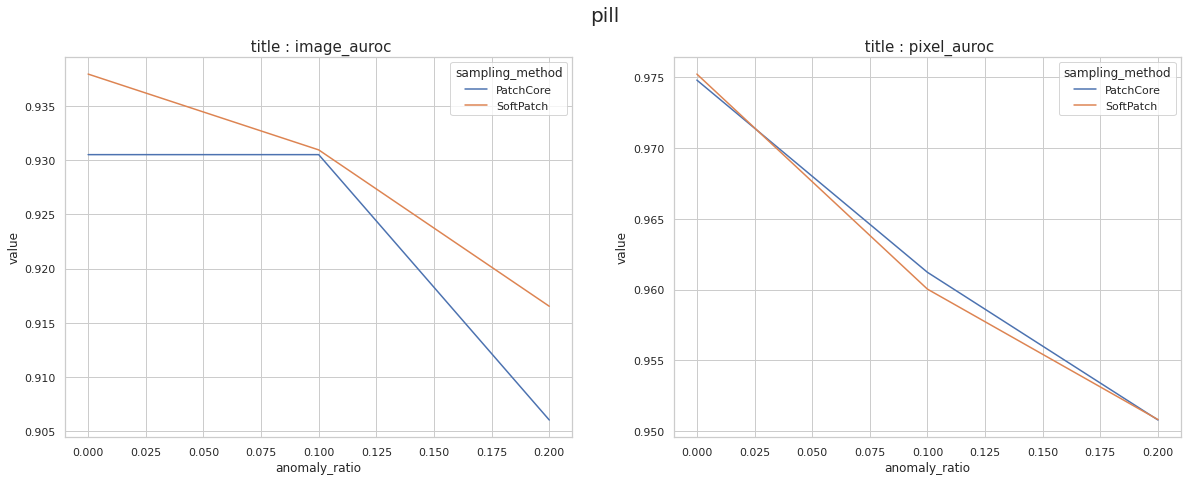

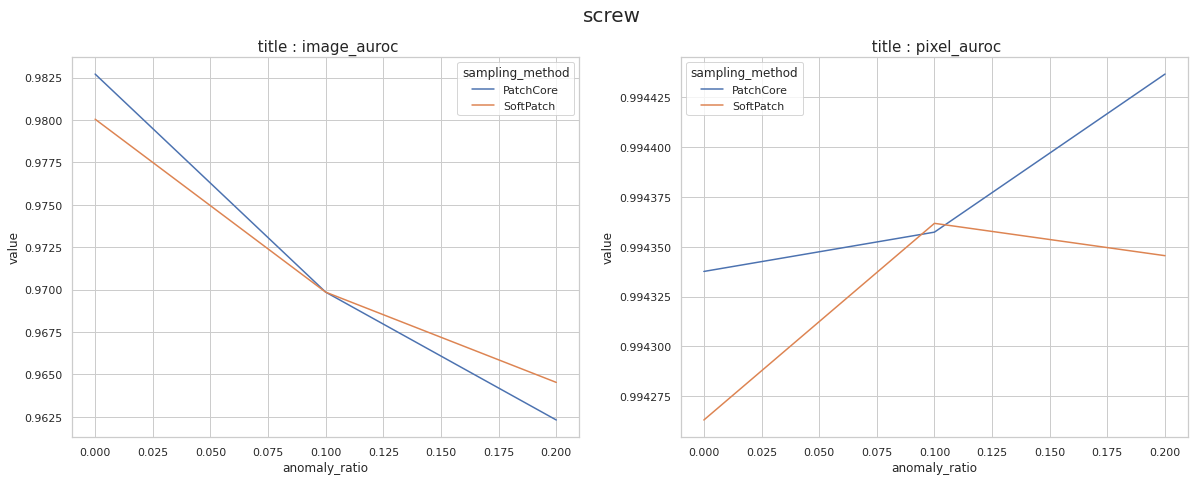

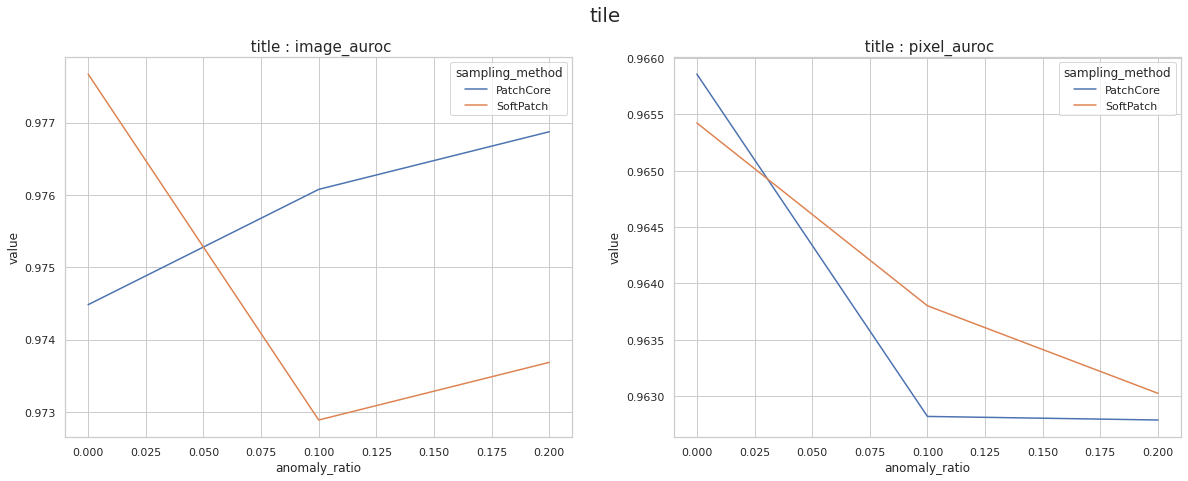

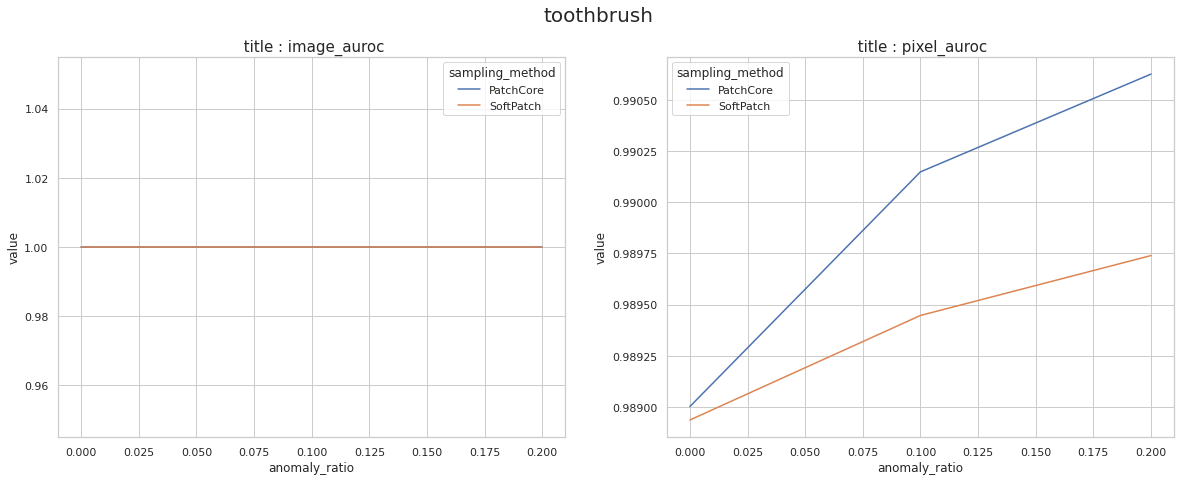

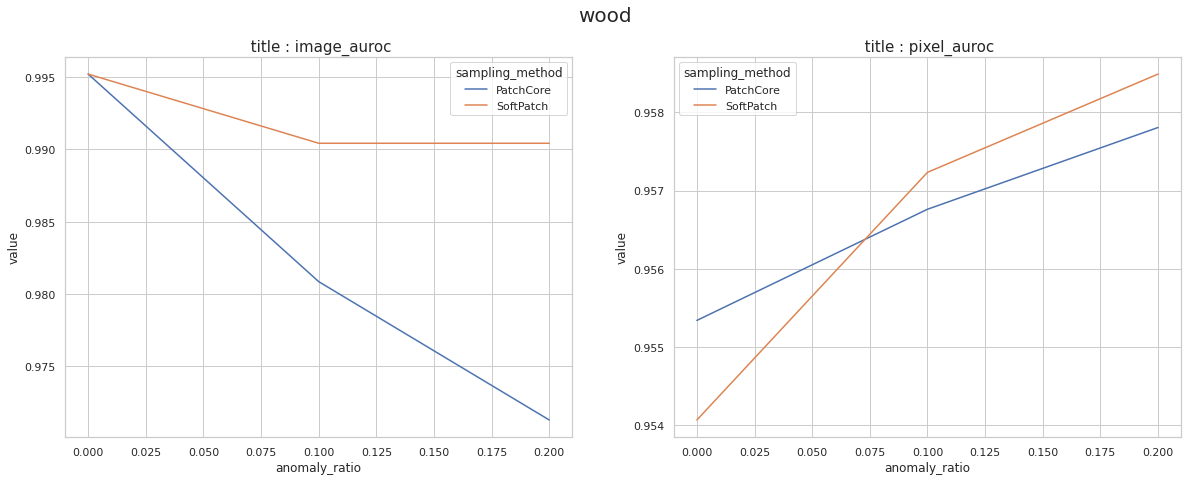

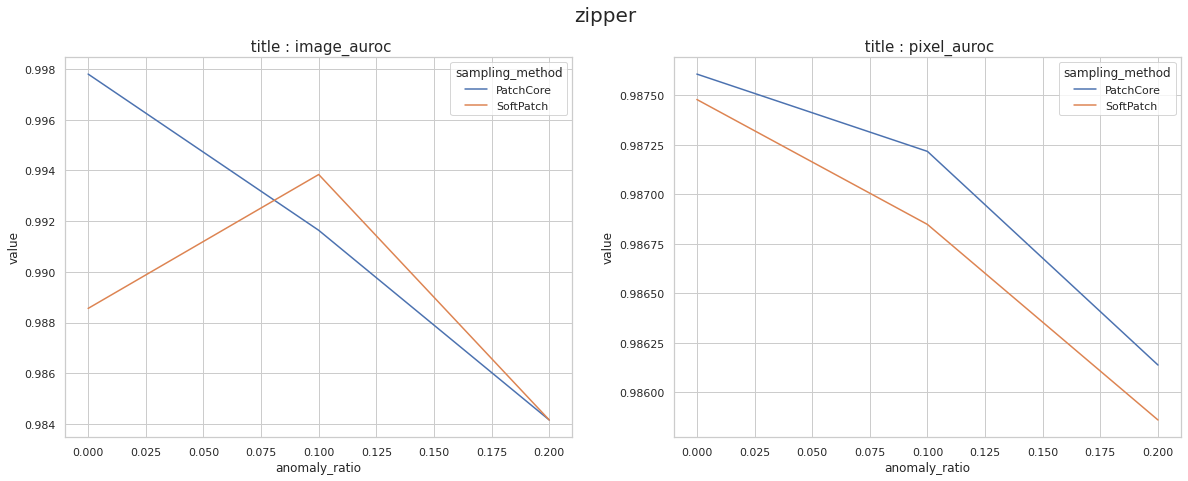

In [6]:
plot_df = df.groupby(['variable','sampling_method','anomaly_ratio','index','class'])['value'].mean().reset_index()

for class_name in plot_df['class'].unique():
    fig,axes = plt.subplots(1,2, figsize=(20,7))

    for i, a_type in enumerate(['image_auroc', 'pixel_auroc']):
        sns.lineplot(
            x = 'anomaly_ratio',
            y = 'value',
            hue = 'sampling_method',
            data = plot_df[(plot_df['index'] == a_type) & (plot_df['class']==class_name)],
            ax = axes[i]
        )   
        
        axes[i].set_title(f" title : {a_type}",size=15)
    fig.suptitle(class_name,size=20)
    
    plt.show()


In [145]:
pivot_df = plot_df.pivot_table(index=['sampling_method','index'],columns=['class','anomaly_ratio'],values='value')
pivot_df = pivot_df.loc['PatchCore'].values - pivot_df.loc['SoftPatch']

img_pivot = pivot_df.loc['img_level'].reset_index()
img_pivot['index']= 'img_level'
img_pivot.columns = ['class','anomaly_ratio','value','index']

pix_pivot = pivot_df.loc['pix_level'].reset_index()
pix_pivot['index']= 'pix_level'
pix_pivot.columns = ['class','anomaly_ratio','value','index']
pivot_df = pd.concat([img_pivot,pix_pivot])

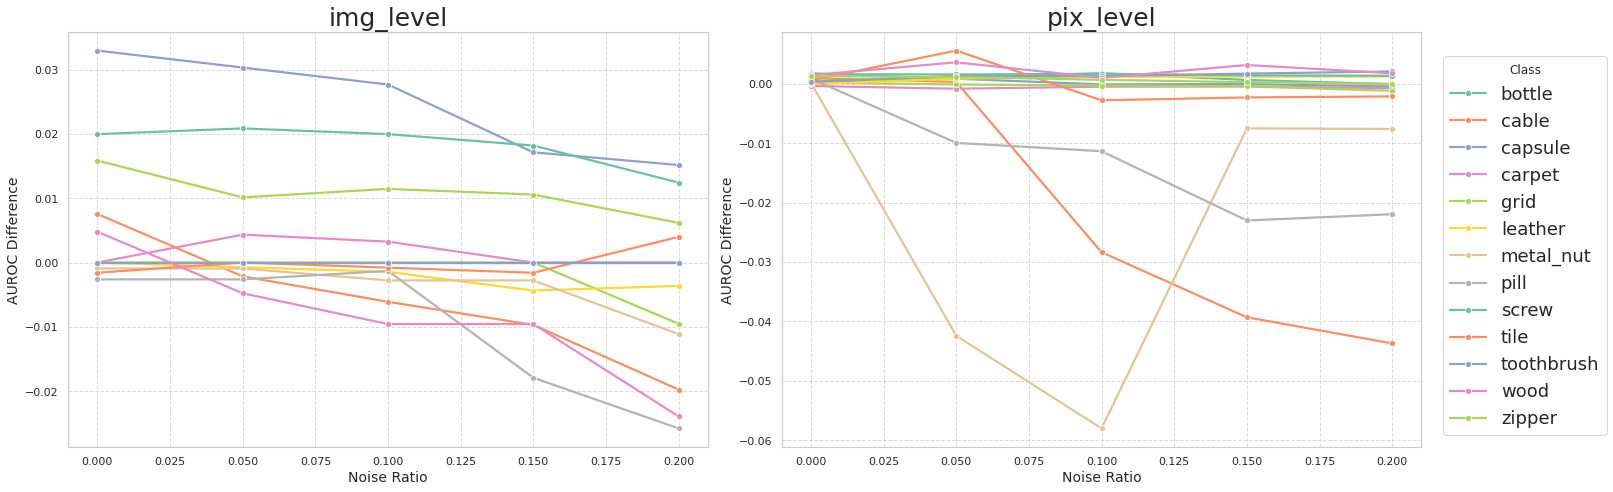

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing DataFrame and code
# ...

# Styling
sns.set(style="whitegrid")  # Set the background style

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

for i, a_type in enumerate(['img_level', 'pix_level']):
    sns.lineplot(
        x='anomaly_ratio',
        y='value',
        hue='class',
        data=pivot_df[pivot_df['index'] == a_type],
        linewidth=2.2,
        markers=True,  # Show markers at data points
        marker='o',    # Marker style
        palette='Set2',  # Color palette
        errorbar=None,  # Disable confidence intervals,
        ax = axes[i]
    )
    axes[i].set_title(f"{a_type}", size=25)
    axes[i].set_xlabel("Noise Ratio", size=14)
    axes[i].set_ylabel("AUROC Difference", size=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend().set_visible(False)

# Adjust legend for both subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=18, title='Class', bbox_to_anchor=(1.0, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [154]:
pivot_df[(pivot_df['index']=='img_level') & (pivot_df['class']=='wood')]

,class,anomaly_ratio,value,index
55,wood,0.00,0.004785,img_level
56,wood,0.05,-0.004785,img_level
57,wood,0.10,-0.009569,img_level
58,wood,0.15,-0.009569,img_level
59,wood,0.20,-0.023923,img_level


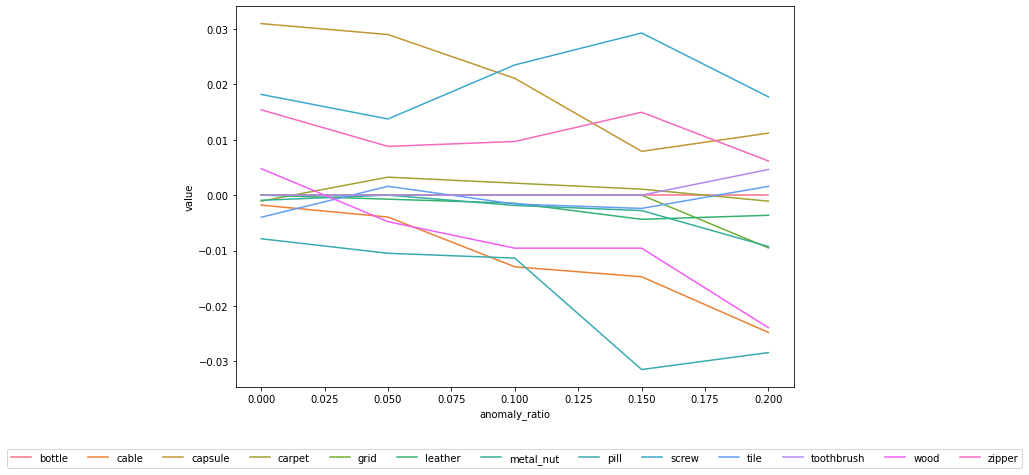

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have pivot_df defined
plt.figure(figsize=(10, 7))
sns.lineplot(
    x='anomaly_ratio',
    y='value',
    hue='class',
    data=pivot_df[pivot_df['index'] == 'img_level']
)

# Place legend below the figure in a horizontal layout
plt.legend(bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=len(pivot_df['class'].unique()))
plt.show()


# Noiseless 비교 

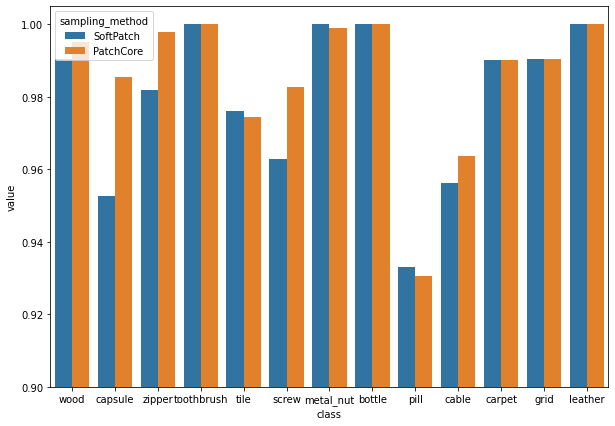

In [23]:
plot_df = df[df['anomaly_ratio']==0.00].reset_index(drop=True)

plt.figure(figsize=(10,7))
sns.barplot(
    x = 'class',
    y = 'value',
    hue = 'sampling_method',
    data = plot_df[plot_df['index']=='img_level']
)


plt.ylim(0.9,1.005)
plt.show()


In [31]:
glob('../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/*')

['../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/034',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/017',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/125',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/083',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/025',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/039',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/033',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/090',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/016',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/048',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/098',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/005',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/069',
 '../Data/MVTecLoco/juice_bottle/ground_truth/logical_anomalies/072',
 '../Data/MVTecLoco/

In [33]:
pivot_df = df.pivot_table(index='sampling_method', columns=['anomaly_ratio'], values='value', aggfunc='first')
pivot_df.loc['difference'] = pivot_df.loc['PatchCore'] - pivot_df.loc['SoftPatch']
pivot_df

anomaly_ratio,0.00,0.05,0.10,0.15,0.20
sampling_method,,,,,
PatchCore,0.995215,0.985646,0.980861,0.980861,0.971292
SoftPatch,0.990431,0.990431,0.990431,0.990431,0.995215
difference,0.004785,-0.004785,-0.009569,-0.009569,-0.023923


# DAE 

In [11]:
with open('./results/MVTecAD/dae/directly_denoising_log.txt','r') as f: 
    data = f.readlines()

direct = pd.DataFrame([eval(d) for d in data])
direct.columns = ['class_name','anomaly_ratio','pixel_auroc','image_auroc']
direct['sampling_method'] = 'DAE-direct'
direct = direct.groupby(['class_name','anomaly_ratio','sampling_method','image_auroc','pixel_auroc']).mean().reset_index()

In [12]:
with open('./results/MVTecAD/dae/log.txt','r') as f: 
    data = f.readlines()

dae = pd.DataFrame([eval(d) for d in data])
dae.columns = ['class_name','anomaly_ratio','pixel_auroc','image_auroc']
dae['sampling_method'] = 'DAE-outlier'
dae = dae.groupby(['class_name','anomaly_ratio','sampling_method','image_auroc','pixel_auroc']).mean().reset_index()

# version = ['noisedad_nn5-identity-sampling_ratio_0.1-anomaly_ratio_0.*-n_query_0',
#            'noisedad-lof-sampling_ratio_0.1-anomaly_ratio_0.*-n_query_0']

version = ['noisedad_nn5-*-sampling_ratio_0.1-anomaly_ratio_*-n_query_0']


result_dir = './results/MVTecAD/'
method = 'PatchCore'
log_dirs = np.concatenate([glob(os.path.join(result_dir,method,'*',v,'seed_0','log.txt')) for v in version])

df = pd.DataFrame()

for log_dir in log_dirs:
    auroc_list = {}
    class_name = log_dir.split('/')[4]
    
    data = load_df(log_dir)
    
    data = pd.DataFrame(data['test_metrics'][0]).iloc[0,:].reset_index()
    temp_df = data 
    
    temp_df['class'] = class_name 
    temp_df['anomaly_ratio'] = float(log_dir.split('/')[-3].split('-')[-2].split('_')[-1])
    temp_df['sampling_method'] = log_dir.split('/')[-3].split('-')[1]
    temp_df['exp_name'] = log_dir.split('/')[-3].split('-')[0]
    
    
    df = pd.concat([df,temp_df])

df = df.melt(['index','class','anomaly_ratio','sampling_method','exp_name'])

# sampling method identity,랑 lof만 남기기 
df = df[(df['sampling_method'] =='identity') | (df['sampling_method'] =='lof')].reset_index(drop=True)

# 이름 바꾸기 
df.loc[df['sampling_method']=='identity','sampling_method'] = 'PatchCore'
df.loc[df['sampling_method']=='lof','sampling_method'] = 'SoftPatch'


#result = df.pivot_table(index=['exp_name','class','sampling_method','index'],columns=['variable','anomaly_ratio'],values='value')
result = df.groupby(['anomaly_ratio','exp_name','sampling_method','index'])['value'].mean().reset_index().pivot(index=['exp_name','sampling_method','anomaly_ratio'],columns='index',values='value')

df['index'] = df['index'].apply(lambda x : 'image_auroc' if x == 'img_level' else 'pixel_auroc')    

df = pd.merge(df[df['index']=='image_auroc'].reset_index(drop=True),df[df['index']=='pixel_auroc'].reset_index(drop=True),on=['class','anomaly_ratio','sampling_method'],how='outer')
df = df.drop(columns = ['index_x','exp_name_x','variable_x','index_y','exp_name_y','variable_y'])
df.columns = ['class_name','anomaly_ratio','sampling_method','image_auroc','pixel_auroc']



In [13]:
df = pd.concat([dae,df,direct]).reset_index(drop=True)

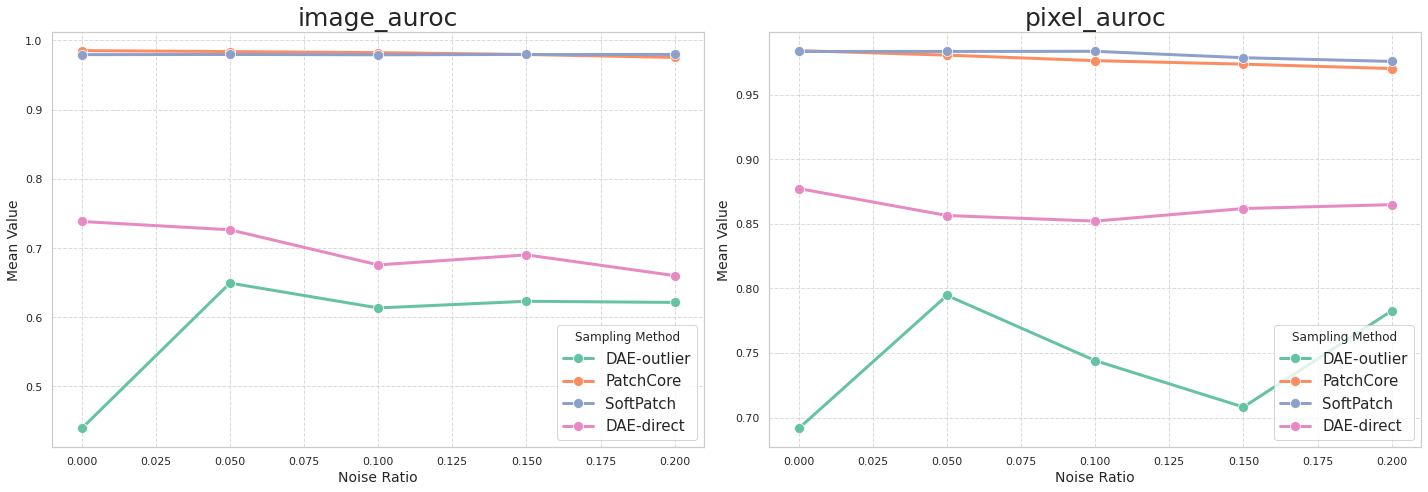

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style="whitegrid")  # Set the background style

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

for i, a_type in enumerate(['image_auroc', 'pixel_auroc']):
    sns.lineplot(
        x='anomaly_ratio',
        y= a_type,
        hue='sampling_method',
        data=df,
        ax=axes[i],
        linewidth=3,
        markers=True,  # Show markers at data points
        marker='o',    # Marker style
        palette='Set2',  # Color palette
        markersize=10,
        errorbar=None  # Disable confidence intervals
    )
    axes[i].legend(fontsize=15, title='Sampling Method')
    title = 'Image AUROC' if a_type == 'image_auroc' else 'Pixel AUROC'
    axes[i].set_title(f"{a_type}", size=25)
    axes[i].set_xlabel("Noise Ratio", size=14)
    axes[i].set_ylabel("Mean Value", size=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
df.groupby(['sampling_method','anomaly_ratio'])['image_auroc','pixel_auroc'].mean()

<ipython-input-6-6cb5b1604ef7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['sampling_method','anomaly_ratio'])['image_auroc','pixel_auroc'].mean()


image_auroc  pixel_auroc
sampling_method anomaly_ratio                          
DAE             0.00              0.439399     0.691593
                0.05              0.668515     0.784814
                0.10              0.639445     0.725578
                0.15              0.623119     0.708131
                0.20              0.621474     0.782657
PatchCore       0.00              0.985365     0.984209
                0.05              0.983971     0.980695
                0.10              0.982427     0.976434
                0.15              0.979768     0.973712
                0.20              0.975502     0.970319
SoftPatch       0.00              0.979525     0.983532
                0.05              0.979788     0.983561
                0.10              0.979328     0.983661
                0.15              0.979772     0.978695
                0.20              0.979813     0.975828

In [3]:
version = ['Baseline-anomaly_ratio_*-n_query_0']

result_dir = './results/MVTecAD/'
method = 'ReconPatch'
log_dirs = np.concatenate([glob(os.path.join(result_dir,method,'*',v,'seed_0','log.txt')) for v in version])

df = pd.DataFrame()

for log_dir in log_dirs:
    auroc_list = {}
    class_name = log_dir.split('/')[4]
    
    data = load_df(log_dir)
    
    data = pd.DataFrame(data['test_metrics'][0]).iloc[0,:].reset_index()
    temp_df = data 
    
    temp_df['class'] = class_name 
    temp_df['anomaly_ratio'] = float(log_dir.split('/')[-3].split('-')[-2].split('_')[-1])
    temp_df['exp_name'] = log_dir.split('/')[-3].split('-')[0]
    
    
    df = pd.concat([df,temp_df])

df = df.melt(['index','class','anomaly_ratio','exp_name'])



result = df.pivot_table(index=['exp_name','class','index'],columns=['variable','anomaly_ratio'],values='value')
# result = df.groupby(['anomaly_ratio','exp_name','sampling_method','index'])['value'].mean().reset_index().pivot(index=['exp_name','sampling_method','anomaly_ratio'],columns='index',values='value')

# df['index'] = df['index'].apply(lambda x : 'image_auroc' if x == 'img_level' else 'pixel_auroc')    

In [5]:
result

variable                          auroc          
anomaly_ratio                       0.0       0.2
exp_name class      index                        
Baseline bottle     img_level  1.000000  1.000000
                    pix_level  0.983575  0.989168
         cable      img_level  0.942466  0.863865
                    pix_level  0.968931  0.929988
         capsule    img_level  0.990427  0.974308
                    pix_level  0.988733  0.987569
         carpet     img_level  0.969904  0.975108
                    pix_level  0.988049  0.986366
         grid       img_level  0.979114  0.990476
                    pix_level  0.984716  0.984449
         hazelnut   img_level  0.999286       NaN
                    pix_level  0.978702       NaN
         leather    img_level  1.000000  0.970203
                    pix_level  0.991765  0.995266
         metal_nut  img_level  1.000000  0.985158
                    pix_level  0.986383  0.903493
         pill       img_level  0.951173  0.910402
                    pix_level  0.971460  0.951681
         screw      img_level  0.973765  0.977384
                    pix_level  0.992399  0.993753
         tile       img_level  0.989538  0.979266
                    pix_level  0.955651  0.967103
         toothbrush img_level  1.000000  1.000000
                    pix_level  0.987462  0.990988
         transistor img_level  0.995417       NaN
                    pix_level  0.958878       NaN
         wood       img_level  0.993860  0.956938
                    pix_level  0.944621  0.952804
         zipper     img_level  0.995798  0.990317
                    pix_level  0.986390  0.988348

In [39]:
df[df['index']=='pix_level'][0.0].mean()

0.9778475853485574